# k-scheduling tests

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from random import sample, seed
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble
from qiskit.algorithms import amplitude_estimators, EstimationProblem
from qiskit.algorithms import IterativeAmplitudeEstimation as BaseIterativeAmplitudeEstimation

from algorithms import IterativeAmplitudeEstimation, ModifiedIterativeAmplitudeEstimation
from algorithms import NoQuantumIterativeAmplitudeEstimation
from operators import *

In [2]:
# for setting a single amplitude, below automates this for arbirtrary numbers of amplitudes
n = 4
N = 2**n
k = N//2
marked = sample(range(N), k)

In [3]:
# Define the estimation problem and oracle function
def make_problems(n, marked):
    
    def good_state(state):
        bin_marked = [(n-len(bin(s))+2)*'0'+bin(s)[2:] for s in marked]
        return (state in bin_marked)

    problem = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )

    problem2 = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )
    
    return problem, problem2

In [4]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096

## IQAE: attempt exponential decay in the number of shots per iteration to account for deeper circuits.

In [5]:
# parameters for IQAE

# amplitudes
n = 4
k = 2**n

# epsilons
powers = range(2,7)
epsilons = [(1.0 / (10**power)) for power in powers]

# other
alpha = 0.05
confint_method = 'chernoff'
verbose = False

a: 16/16 = 1.0
No-Q IAE estimations: [0.9999609600397554, 0.9999988679743712, 0.9999999990852552, 0.9999999999713981, 0.9999999999991053]
Modified IAE estimations: [0.9999626267910486, 0.9999986031231007, 0.9999999953926756, 0.9999999999909862, 0.9999999999995212]
No-Q IAE total queries: 1192837120
Modified IAE total queries: 1560616960
Modified wins? False with 30.83% difference


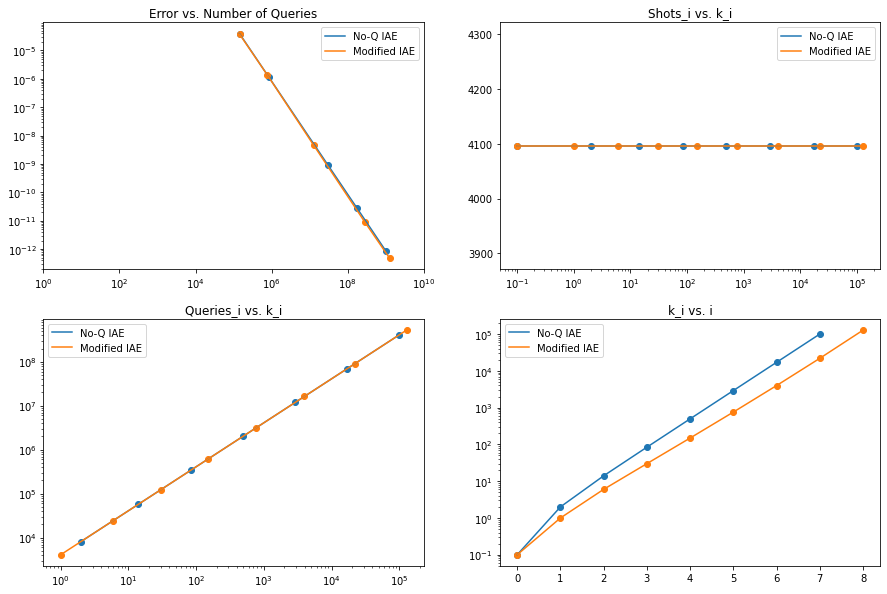

a: 15/16 = 0.9375
No-Q IAE estimations: [0.937650655911248, 0.9374947736183288, 0.9375018861995085, 0.9375000751378835, 0.9375000172865441]
Modified IAE estimations: [0.9374712720891822, 0.937523163296527, 0.9374964704565475, 0.9375000631619035, 0.937499990896933]
No-Q IAE total queries: 1154142208
Modified IAE total queries: 2124464128
Modified wins? False with 84.07% difference


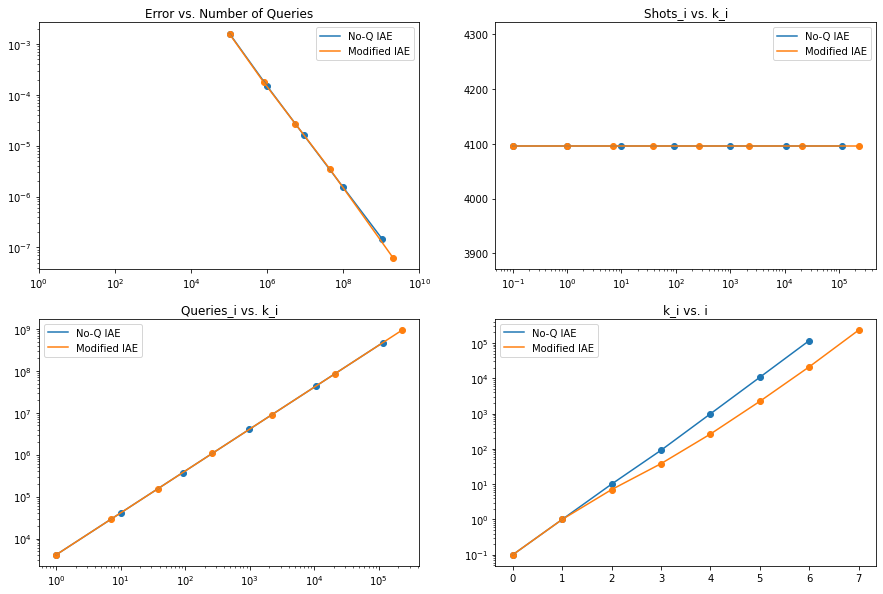

a: 14/16 = 0.875
No-Q IAE estimations: [0.8754473252610819, 0.874984563232549, 0.8749969592583828, 0.8750002084447484, 0.8749999981945086]
Modified IAE estimations: [0.8749666007381713, 0.87504262595213, 0.8749965283163363, 0.8750000854195664, 0.8749999827094938]
No-Q IAE total queries: 983597056
Modified IAE total queries: 3027513344
Modified wins? False with 207.8% difference


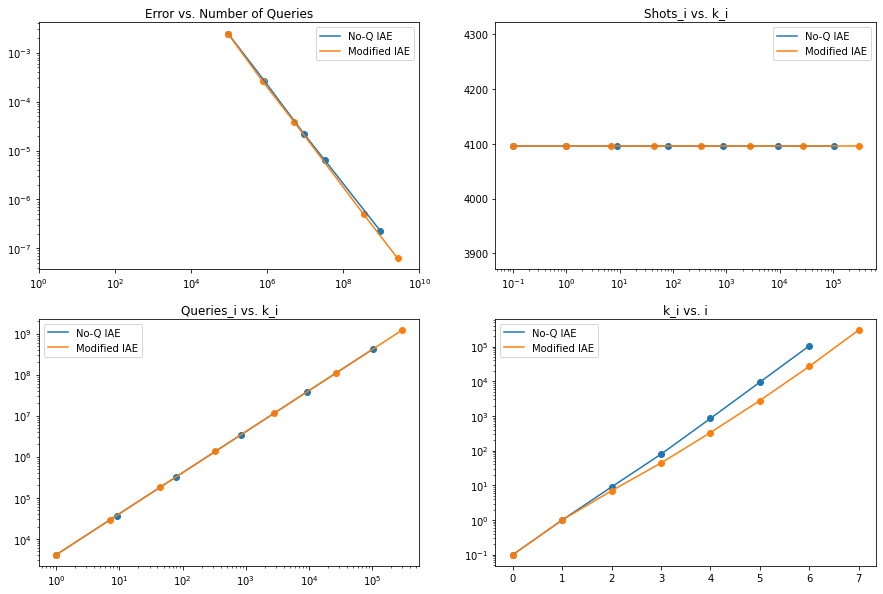

a: 13/16 = 0.8125
No-Q IAE estimations: [0.8127750012881668, 0.8124867108861994, 0.8124969161725963, 0.8124999617113744, 0.8124999942952182]
Modified IAE estimations: [0.8125851963741071, 0.8124916819959402, 0.812501540546088, 0.8124996186446114, 0.8125000272909366]
No-Q IAE total queries: 2238443520
Modified IAE total queries: 519839744
Modified wins? True with 76.78% difference


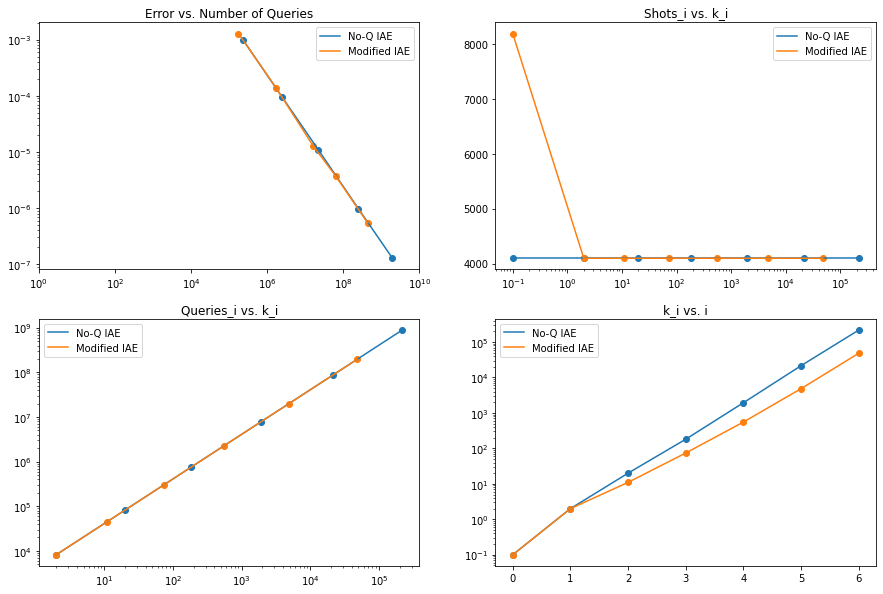

a: 12/16 = 0.75
No-Q IAE estimations: [0.7498479727860743, 0.7499989592195808, 0.7499992863781724, 0.7499994957817953, 0.7500000849759679]
Modified IAE estimations: [0.74987062938153, 0.7500254076496837, 0.7500013784814623, 0.7499999779367813, 0.7499999912188676]
No-Q IAE total queries: 699994112
Modified IAE total queries: 2614218752
Modified wins? False with 273.46% difference


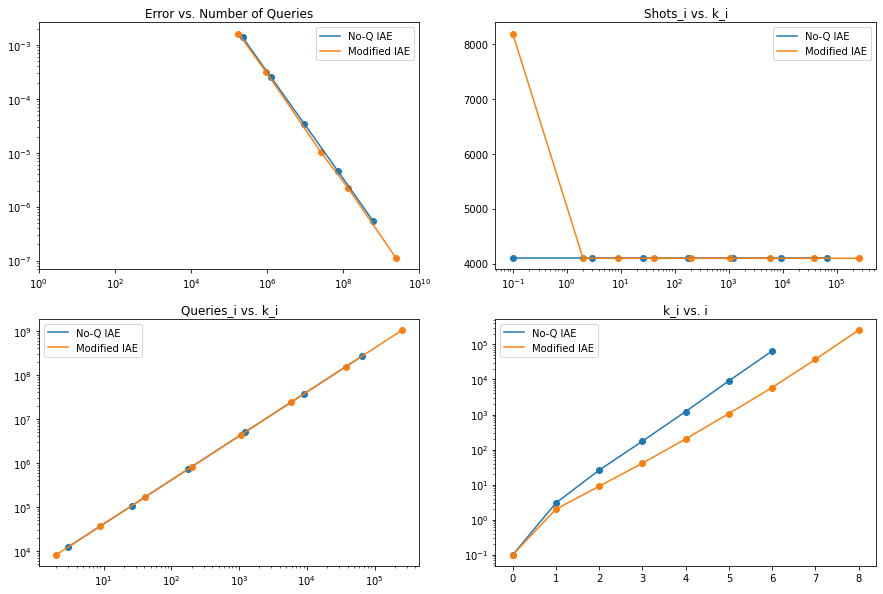

a: 11/16 = 0.6875
No-Q IAE estimations: [0.6873157331037965, 0.687509013225448, 0.6875009627663287, 0.6875000648628068, 0.6875000388831598]
Modified IAE estimations: [0.6878067248126559, 0.6875084113440737, 0.6874979173195247, 0.6875000722875233, 0.6874999913985493]
No-Q IAE total queries: 722235392
Modified IAE total queries: 1917906944
Modified wins? False with 165.55% difference


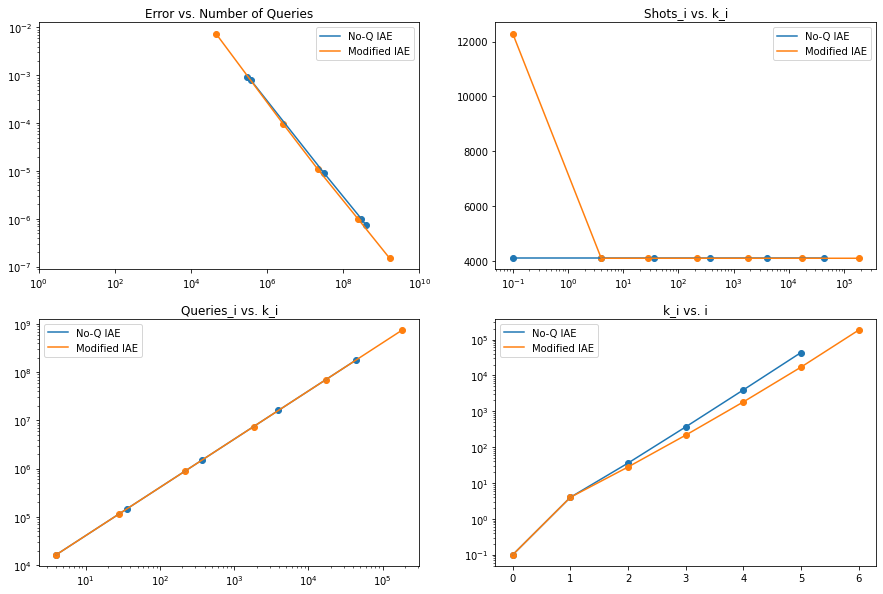

a: 10/16 = 0.625
No-Q IAE estimations: [0.6245881133125519, 0.6249463043463589, 0.624998365452172, 0.6249998165119302, 0.6249999189496747]
Modified IAE estimations: [0.6247199556967044, 0.6249719443949624, 0.6249986045289357, 0.6249998224669459, 0.6249999736521389]
No-Q IAE total queries: 751349760
Modified IAE total queries: 1971048448
Modified wins? False with 162.33% difference


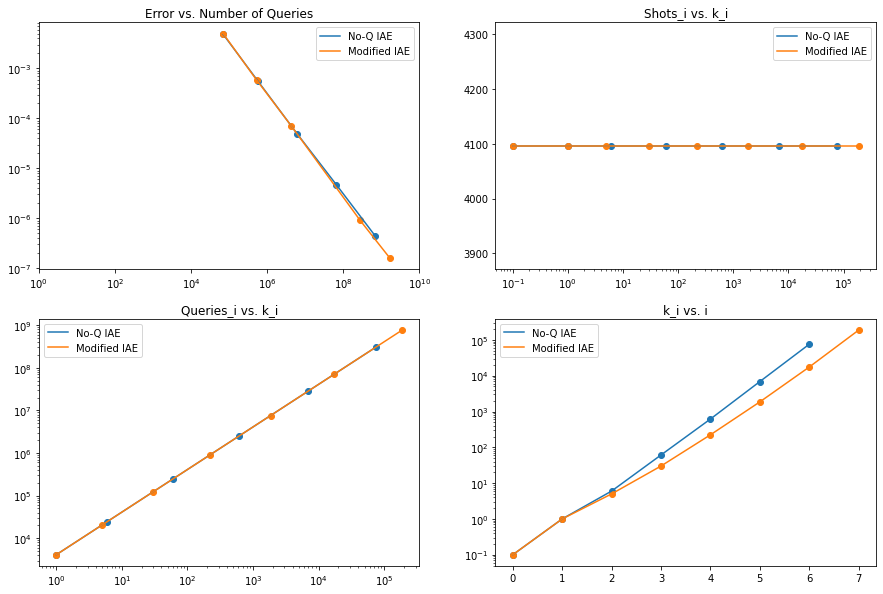

a: 9/16 = 0.5625
No-Q IAE estimations: [0.562520988825137, 0.5624875204777835, 0.5624952771768083, 0.5625000815696692, 0.5625000047348424]
Modified IAE estimations: [0.5628144480690851, 0.5624483931555009, 0.5625027471309745, 0.5625006190874449, 0.5624999709692025]
No-Q IAE total queries: 1658376192
Modified IAE total queries: 533368832
Modified wins? True with 67.84% difference


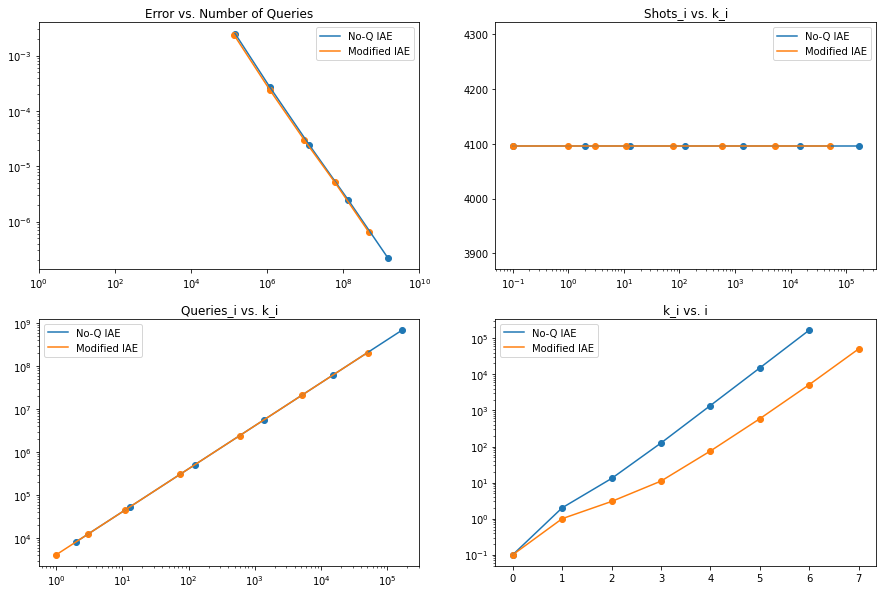

a: 8/16 = 0.5
No-Q IAE estimations: [0.5001342715822942, 0.499938946167109, 0.5000089476383883, 0.5000014185700894, 0.5000000577717938]
Modified IAE estimations: [0.50172518029198, 0.49998475878713583, 0.4999989557681491, 0.5000000723044347, 0.4999999933061557]
No-Q IAE total queries: 489504768
Modified IAE total queries: 812695552
Modified wins? False with 66.02% difference


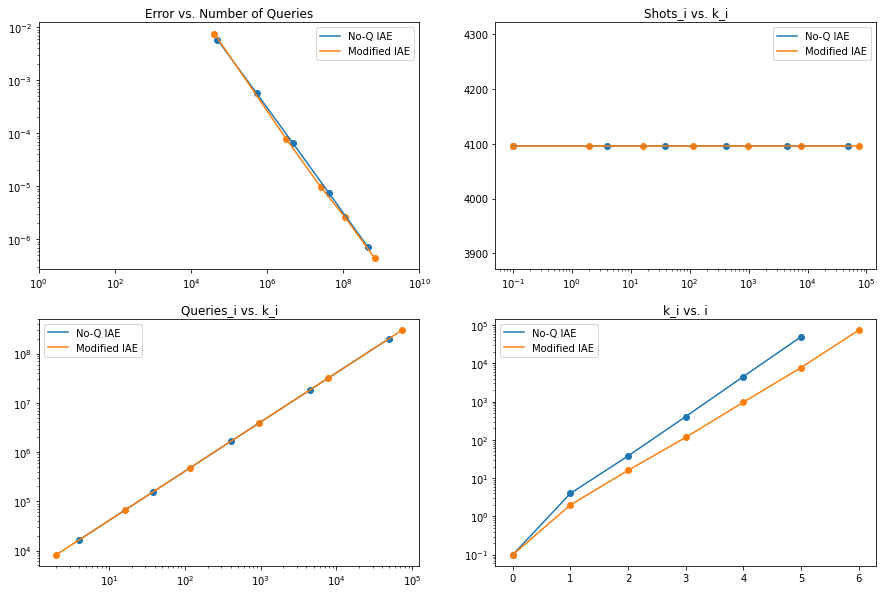

a: 7/16 = 0.4375
No-Q IAE estimations: [0.43719777441622887, 0.43749535145824114, 0.4375004254770376, 0.4374996382427109, 0.43749999388581085]
Modified IAE estimations: [0.43754325791166027, 0.4375096176830611, 0.4375008552628871, 0.43749961201258103, 0.43749997628849396]
No-Q IAE total queries: 1764036608
Modified IAE total queries: 532885504
Modified wins? True with 69.79% difference


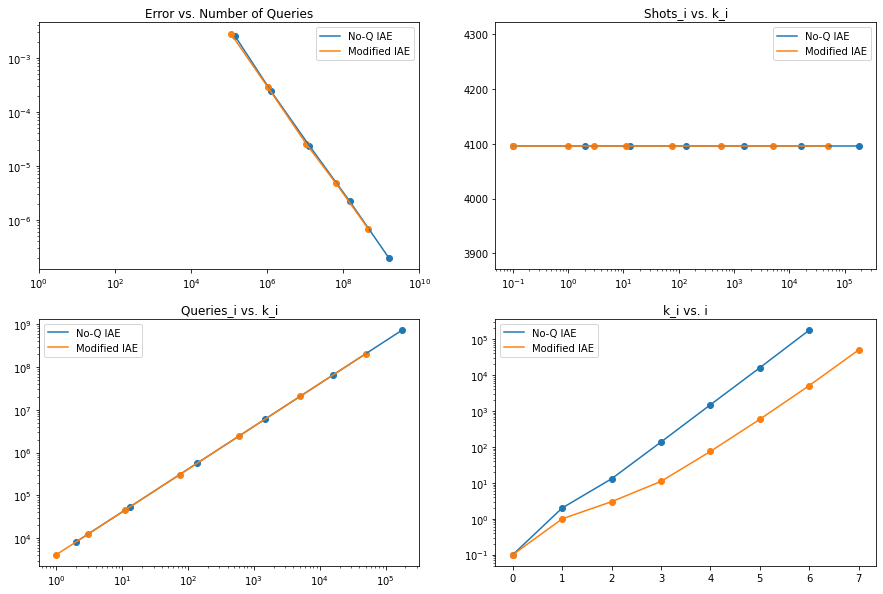

a: 6/16 = 0.375
No-Q IAE estimations: [0.3747123186309529, 0.37505945688432873, 0.3750060427363582, 0.3749995203134202, 0.3749999107273747]
Modified IAE estimations: [0.3756318361907849, 0.3749522913104316, 0.3749963212453147, 0.37500008058849255, 0.3749999995049387]
No-Q IAE total queries: 762335232
Modified IAE total queries: 1965010944
Modified wins? False with 157.76% difference


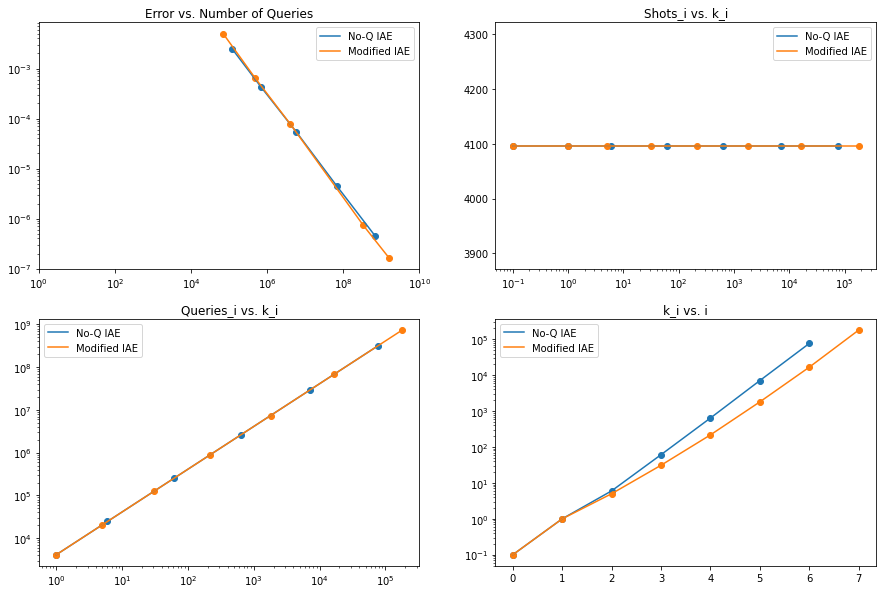

a: 5/16 = 0.3125
No-Q IAE estimations: [0.3131201968163987, 0.31249203178767326, 0.3124970788254178, 0.31250001677016226, 0.31250003755363076]
Modified IAE estimations: [0.3109802151840922, 0.3125711690276858, 0.3124997921522944, 0.31250018547569747, 0.31250003453979724]
No-Q IAE total queries: 754425856
Modified IAE total queries: 1130823680
Modified wins? False with 49.89% difference


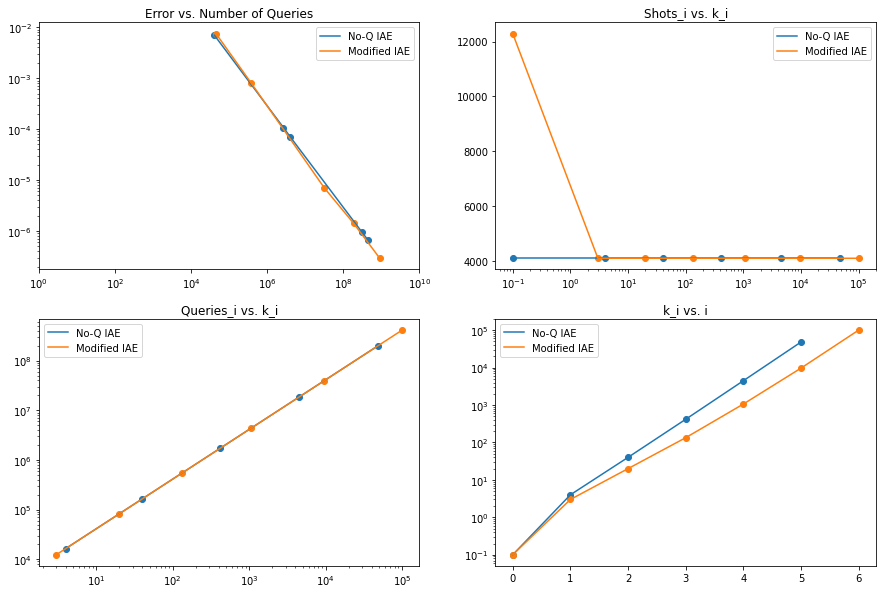

a: 4/16 = 0.25
No-Q IAE estimations: [0.25007316069826135, 0.2500169482857814, 0.24999769372085284, 0.25000033933191507, 0.2500000254302905]
Modified IAE estimations: [0.25000214316807423, 0.25000849024758554, 0.250009695698323, 0.2500001174345077, 0.25000003040330676]
No-Q IAE total queries: 2322677760
Modified IAE total queries: 2406318080
Modified wins? False with 3.6% difference


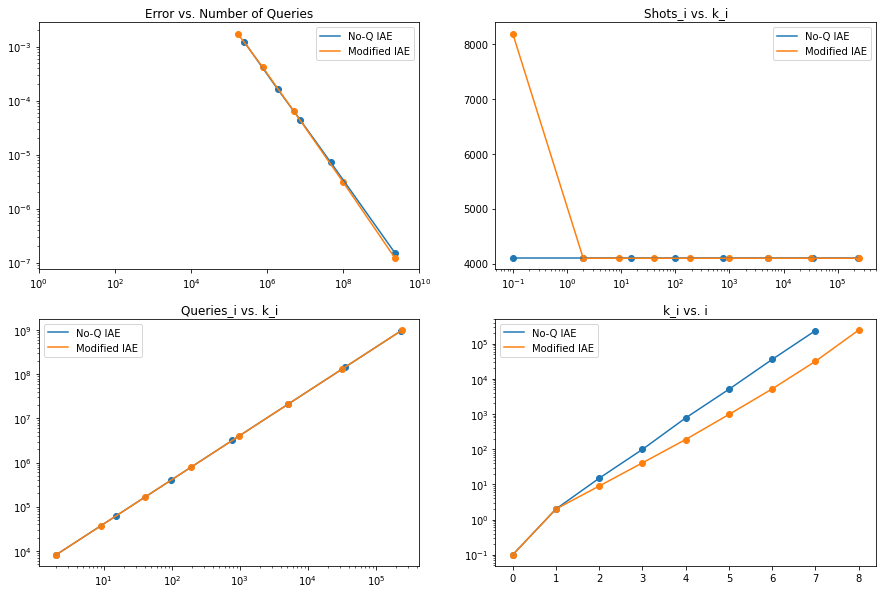

a: 3/16 = 0.1875
No-Q IAE estimations: [0.18744007789249167, 0.18747974644374438, 0.1874991491999065, 0.18749985522888937, 0.18750000063908967]
Modified IAE estimations: [0.18744628179772754, 0.18741427402720853, 0.18749817205595842, 0.18749989396813505, 0.18750004741251652]
No-Q IAE total queries: 3357130752
Modified IAE total queries: 537595904
Modified wins? True with 83.99% difference


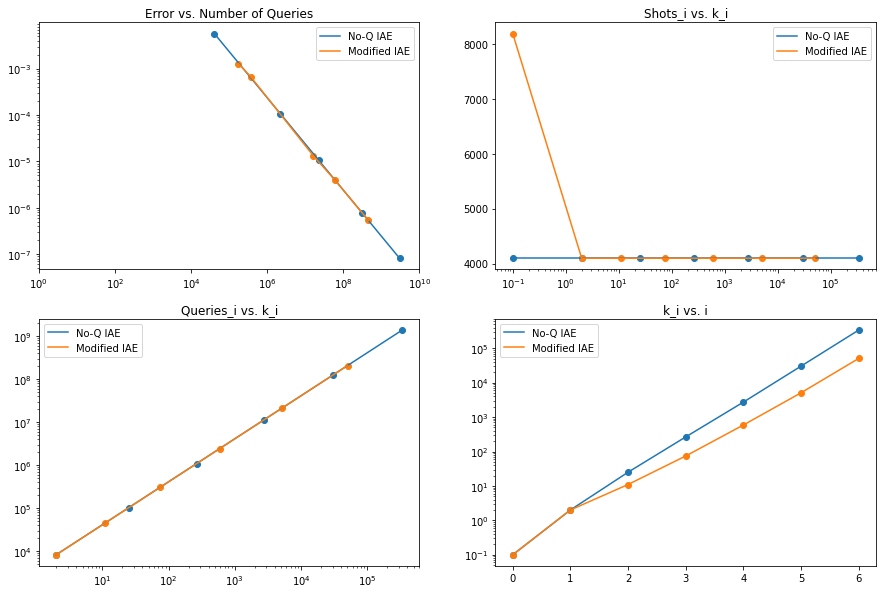

a: 2/16 = 0.125
No-Q IAE estimations: [0.12466618579877153, 0.12505257221254737, 0.1250000001360846, 0.1250000578549967, 0.12500000556596302]
Modified IAE estimations: [0.12503339926182858, 0.12502462215731502, 0.1249844170437642, 0.12500007719499232, 0.12500001084393514]
No-Q IAE total queries: 1069101056
Modified IAE total queries: 3003461632
Modified wins? False with 180.93% difference


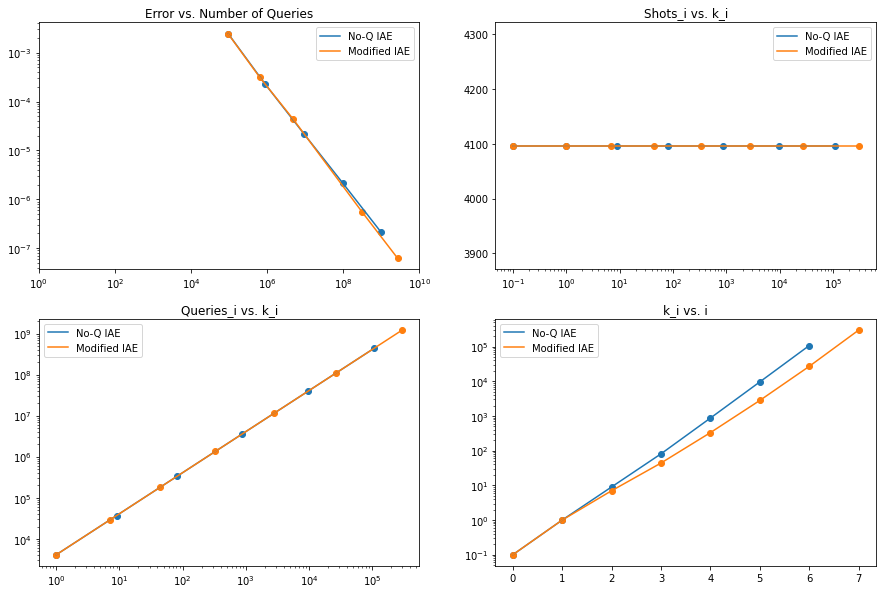

a: 1/16 = 0.0625
No-Q IAE estimations: [0.062411008955050945, 0.062468735712338845, 0.06250120176859504, 0.0625000788496245, 0.0625000178103351]
Modified IAE estimations: [0.06274285535355056, 0.062469000829413646, 0.06250176068452938, 0.06249976580337515, 0.06250000061316428]
No-Q IAE total queries: 1422340096
Modified IAE total queries: 2066563072
Modified wins? False with 45.29% difference


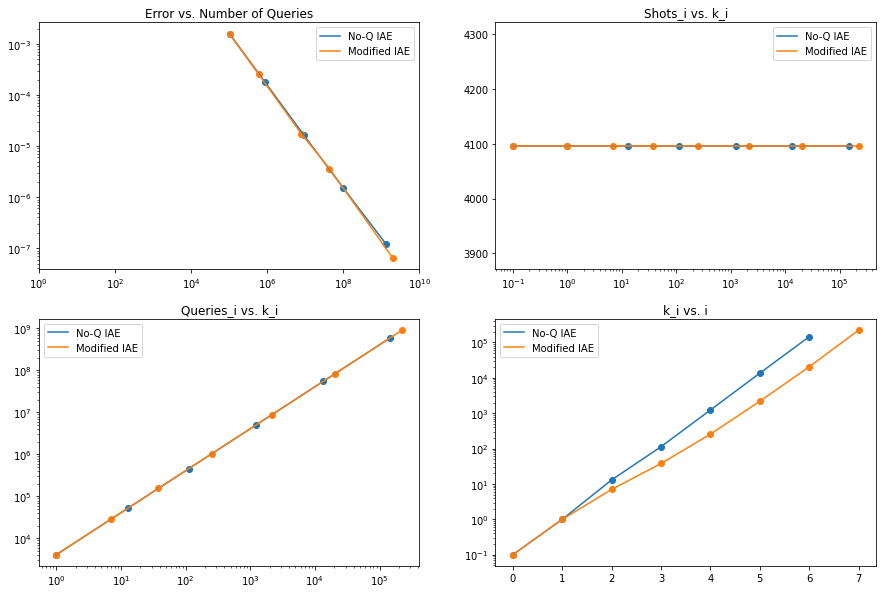

% modified > original: 0.25


In [6]:
# stats recording
iae_epsilon = []
iae_nshots = []
miae_epsilon = []
miae_nshots = []

wins = matches = 0

while k >= 1:
    
    # setup problems with specified N,k
    N = 2**n
    marked = sample(range(N), k)
    problem, problem2 = make_problems(n, marked)
    
    # execute experiments for each power
    miae_results = [] 
    iae_results = []
    
    for i, epsilon in enumerate(epsilons):
        if verbose:
            print('ε:',epsilon)
            
        MIAE = NoQuantumIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                           alpha=alpha, 
                                           confint_method=confint_method, 
                                           quantum_instance=aer_sim)
        
        IAE = ModifiedIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                alpha=alpha, 
                                                confint_method=confint_method, 
                                                quantum_instance=aer_sim)
        
        exprs = ['No-Q IAE', 'Modified IAE']
        
        # configure the number of shots this way and pray that it works
        MIAE._quantum_instance._run_config.shots = shots
        IAE._quantum_instance._run_config.shots = shots
        
        # for recording intermediate algo results
        state = defaultdict(dict)
        state2 = defaultdict(dict)
        
        miae_result = MIAE.estimate(problem,
                                    state=state,
                                    k0=k,
                                    N=N,
                                    verbose=verbose)
        
        iae_result = IAE.estimate(problem2,
                                  state=state2,
                                  verbose=verbose)
        
        miae_results.append(miae_result)
        iae_results.append(iae_result)
        if verbose:
            print()
    
    # process results
    miae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in miae_results]
    miae_nshots_i  = [res.num_oracle_queries for res in miae_results]

    iae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in iae_results]
    iae_nshots_i  = [res.num_oracle_queries for res in iae_results]
    
    print(f'a: {k}/{N} = {k/N}')
    print(f'{exprs[0]} estimations:', [res.estimation for res in miae_results])
    print(f'{exprs[1]} estimations:', [res.estimation for res in iae_results])
    
    miae_total_queries, iae_total_queries = sum(miae_nshots_i), sum(iae_nshots_i)
    print(f'{exprs[0]} total queries:', miae_total_queries)
    print(f'{exprs[1]} total queries:' , iae_total_queries)
    
    diff = round(abs(iae_total_queries - miae_total_queries) / miae_total_queries * 100, 2)
    print('Modified wins?', iae_total_queries < miae_total_queries, f'with {diff}% difference')
    
    wins += int(iae_total_queries < miae_total_queries)
    matches += 1
    
    # graph k_i vs num_shots
    def process_state(state):
        if len(state) == 0: return [],[]
        round_shots = state['round_shots']
        queries = state['n_queries']
        shots_at_k0 = round_shots.pop(0)
        queries_at_k0 = queries.pop(0)
    
        k_i = [k for k in round_shots]
        queries_i = [queries[k] for k in k_i]
        shots_i = [shots_at_k0] + [round_shots[k] for k in k_i]
    
        k_i.insert(0, 0.1)
        
        return shots_i, queries_i, k_i
    
    mod_shots, mod_queries, mod_k = process_state(state)
    base_shots, base_queries, base_k = process_state(state2)

    fig,axs = plt.subplots(2,2,figsize=(15,10))
    
    # plot query complexity
    
    axs[0,0].set_yscale('log')
    axs[0,0].set_xscale('log')
    axs[0,0].set_xlim(1, 10**10)
    axs[0,0].set_title('Error vs. Number of Queries')
    
    axs[0,0].scatter(miae_nshots_i, miae_epsilon_i)
    axs[0,0].plot(miae_nshots_i, miae_epsilon_i)
    axs[0,0].scatter(iae_nshots_i, iae_epsilon_i)
    axs[0,0].plot(iae_nshots_i, iae_epsilon_i)
    
    axs[0,0].legend(exprs)
    
    # plots for shots vs k
    axs[0,1].set_xscale('log')
    axs[0,1].set_title('Shots_i vs. k_i')
    
    axs[0,1].plot(mod_k, mod_shots)
    axs[0,1].scatter(mod_k, mod_shots)
    axs[0,1].plot(base_k, base_shots)
    axs[0,1].scatter(base_k, base_shots)
    
    axs[0,1].legend(exprs)
    
    # plots for nqueries vs k
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_title('Queries_i vs. k_i')
    
    axs[1,0].plot(mod_k[1:], mod_queries)
    axs[1,0].scatter(mod_k[1:], mod_queries)
    axs[1,0].plot(base_k[1:], base_queries)
    axs[1,0].scatter(base_k[1:], base_queries)
    
    axs[1,0].legend(exprs)
    
    # plots for k
    axs[1,1].set_yscale('log')
    axs[1,1].set_title('k_i vs. i')
    
    axs[1,1].plot(mod_k)
    axs[1,1].scatter(range(len(mod_k)), mod_k)
    axs[1,1].plot(base_k)
    axs[1,1].scatter(range(len(base_k)), base_k)
    
    axs[1,1].legend(exprs)
    
    plt.show()
    
    # save results for epsilon vs nshots
    miae_nshots.append(miae_nshots_i)
    miae_epsilon.append(miae_epsilon_i)
    iae_nshots.append(iae_nshots_i)
    iae_epsilon.append(iae_epsilon_i)
    k -= 1
    
iae_nshots = np.array(iae_nshots)
print('% modified > original:', wins/matches)

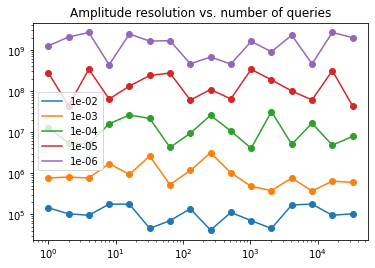

In [8]:
for i in range(len(epsilons)):
    plt.plot(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])
    plt.scatter(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])

plt.title('1/Input amplitude vs. number of queries')
plt.legend(['{:.0e}'.format(eps) for eps in epsilons])
plt.xscale('log')
plt.yscale('log')

plt.show()